Names: Tyler Lui, Hieu Nguyen, Mike Ball, Emery Monroy, Parastoo Toosi <br>
CPSC 439 Section 1 Spring Semester 2024 <br>
Project 1:  DFAs and Turing Machines!

Below is the DFA for the first langauge listed in exercise 2.13 from the textbook

alphabet: {0,1}
{w: w contains at least three 1s}

# DFA

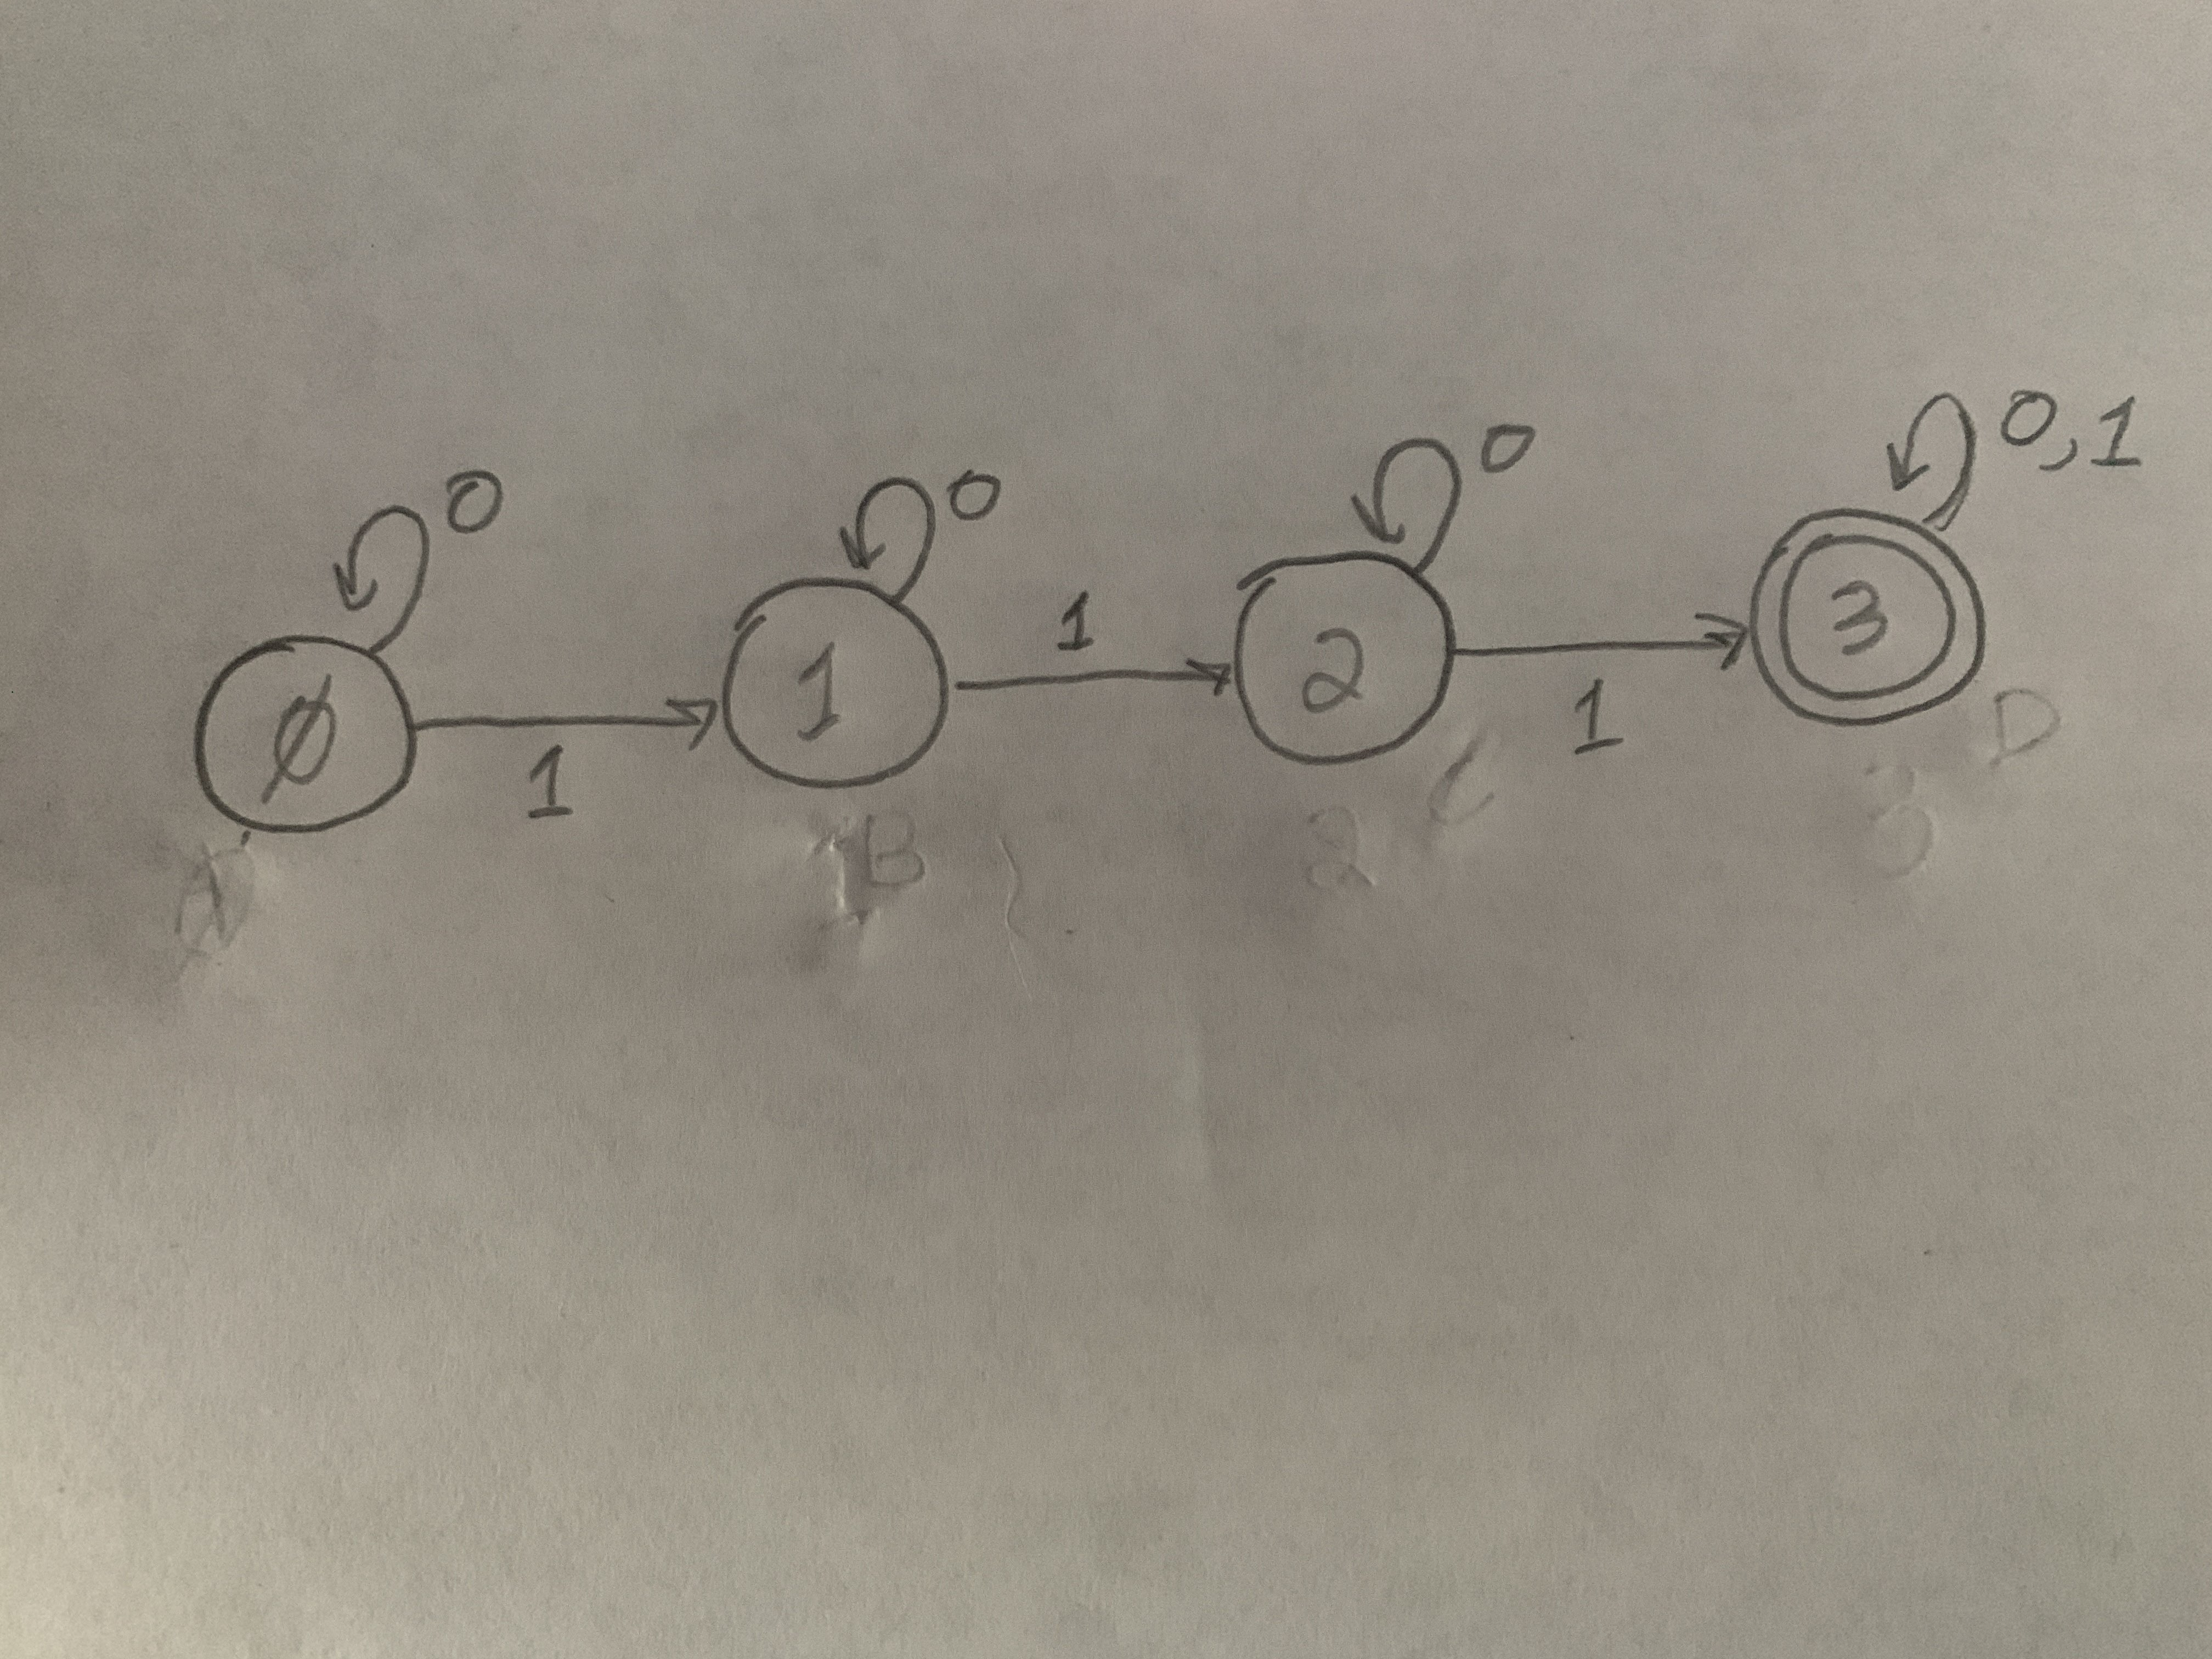

This section is done by Hieu Nguyen

The following is an implementation of the DFA in python for the first language listed in Exercise 2.13: <br>

alphabet: {0, 1}

{w : w contains at least three 1s}

In [ ]:
'''
0 0 1
1 1 2
2 2 3
3 3 4
4 4 4
'''

def dfa_1(str):
  state = 1
  accepting_state = [4]
  table = [[0, 0, 1], [1, 1, 2], [2, 2, 3], [3, 3, 4], [4, 4, 4]]
  n = len(str)
  i = 0
  while i < n:
    if str[i] == '0':
      state = table[state][1]
      i += 1
    elif str[i] == '1':
      state = table[state][2]
      i += 1

  if state == accepting_state[0]:
    return 1
  else:
    return 0


string = input()
legal_string = ""
i = 0
while (i < len(string)):
  if string[i] == '1' or string[i] == '0':
    legal_string += string[i]
    i += 1
  else:
    print('Invalid Language')
    break

result = dfa_1(legal_string)

if result == 1:
  print('Accepted')
if result == 0:
  print('Not Accepted')


0000000000000000000011
Not Accepted


Written by Mike Ball \
Formal Definition of DFA: <br>
Using Sipser's definition of a finite automata, we will define this DFA as a five-tuple (Q,Σ,δ,q0​,F) <br>
Q = set of states <br>
Σ = Alphabet of language <br>
δ = transition function <br>
q0 = initial state <br>
F = set of accepting states <br>

Q = {0,1,2,3}<br>
Σ = {0,1}<br>
δ = <br>


| s         | path     | T(s,path) |
|--------------|-----------|------------|
| 0 | 0      |0        |
| 0      | 1  |   1     |
| 1      | 0  |    1    |
| 1      | 1  |     2   |
| 2      | 0 |     2   |
| 2      | 1  |     3   |
| 3      | 0  |     3   |
| 3      | 1  |     3   |

= {(0,0,0),(0,1,1),(1,0,1),(1,1,2),(2,0,2),(2,1,3),(3,0,3),(3,1,3)} <br>
q0 = 0 <br>
F = {3} <br>

So **the whole definition combined is: <br>
({0,1,2,3},{0,1},{(0,0,0),(0,1,1),(1,0,1),(1,1,2),(2,0,2),(2,1,3),(3,0,3),(3,1,3)},0,{3})**

# TM Regular Language

Next, we defined the TM of the same chosen regular language. Below is what we brainstormed and defined on paper

**Design a Turing Machine to recognize your chosen regular language.**
This section was done by Tyler Lui

Based on the section on TM on the textbook, We are going to Let PAL be the function with an input of x∈{0,1}∗ that results in the output of 1 when x is an even legth of the palindromes for n ∈ N.
On the table below, we are going to show a Turning Machine that starts at 0 and after returning outputs, it will stop the machine at the very last state.



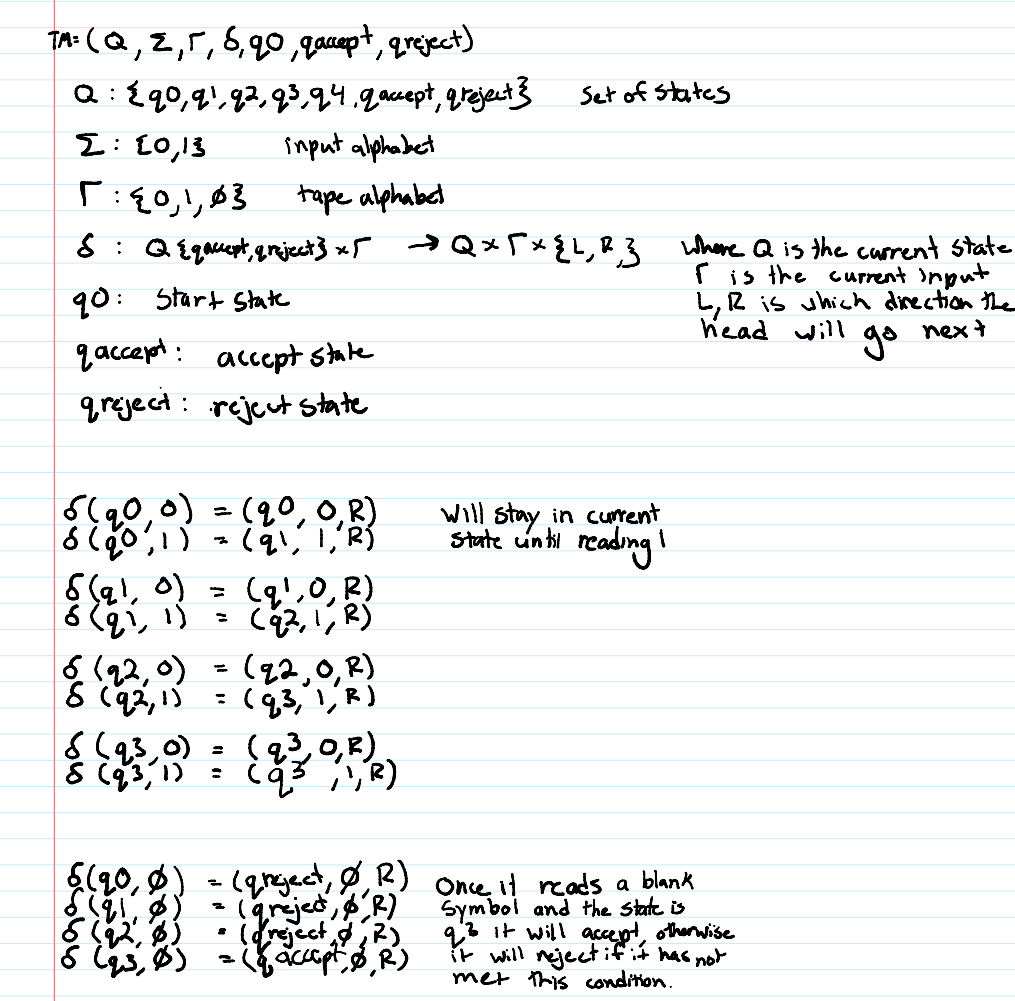

The above definition is from this university lecture material:
https://homepages.gac.edu/~sskulrat/Courses/2019S-265/lectures/tm.html

# Implementation TM Regular Language



Now, we will be implement the TM with the NAND-TM programming language.**

NAND-TM is a Turing-complete programming language based on the NAND gate.
# Define states
STATE q0 q1 q2 q3

# Define alphabet
ALPHABET 0 1 x y _

# Define initial state
INITIAL q0

# Define accept and reject states
ACCEPT q3
REJECT

# Define transitions
TRANSITION q0 0 q1 x R
TRANSITION q0 1 q1 y R
TRANSITION q1 0 q1 0 R
TRANSITION q1 1 q1 1 R
TRANSITION q1 _ q2 _ L
TRANSITION q2 x q2 x L
TRANSITION q2 y q2 y L
TRANSITION q2 0 q3 x R
TRANSITION q2 1 q3 y R

Above, we have the definition for the states, alphabet, initial state, accept state, reject state, and transitions of the TM.

Each transition is defined with the current state, current symbol, next state, new symbol to write, and direction to move the tape head. The TM starts in state q0 and halts when it reaches state q3.

Below Code by Tyler Lui

In [ ]:
def turing_machine(input_string):
  tape = list(input_string) + ['_']
  start_state = 'q0'
  accept_state = 'qaccept'
  reject_state = 'qreject'

  transitions = {
      ('q0', '0'): ('q0', '0', 'R'),
      ('q0', '1'): ('q1', '1', 'R'),
      ('q1', '0'): ('q1', '0', 'R'),
      ('q1', '1'): ('q2', '1', 'R'),
      ('q2', '0'): ('q2', '0', 'R'),
      ('q2', '1'): ('q3', '1', 'R'),
      ('q3', '0'): ('q3', '0', 'R'),
      ('q3', '1'): ('q3', '1', 'R'),
      ('q0', '_'): ('qreject', '_', 'R'),
      ('q1', '_'): ('qreject', '_', 'R'),
      ('q2', '_'): ('qreject', '_', 'R'),
      ('q3', '_'): ('qaccept', '_', 'R')
  }

  current_state = start_state
  head_pos = 0

  while current_state != accept_state and current_state != reject_state:
    symbol = tape[head_pos]
    if (current_state, symbol) not in transitions:
      current_state = reject_state
      break
    if (current_state, symbol) in transitions:
      next_state, next_symbol, direction = transitions[(current_state, symbol)]
      tape[head_pos] = next_symbol
      if direction == 'R':
        head_pos += 1
      elif direction == 'L':
        head_pos -= 1
      current_state = next_state
    else:
      current_state = reject_state

  return current_state


input_string = input()
result = turing_machine(input_string)
if result == 'qaccept':
  print("Accepted")
elif result == 'qreject':
  print("Rejected")
else:
  print("Error")

100011
Accepted


#Implementation of Non-regular Language TM



This section is done by Mike Ball and Emery Monroy

Non-regular language definition: A non-regular language is a language that cannot be represented by a DFA, because it requires an unbounded ammount of memory to compute.
Non-regular languages take an infinite amount of memory to compute.

The modification for the language we chose is the following: <br>

L = {0<sup>n</sup>1<sup>n</sup> | n ∈ ℕ } <br>

So the language would be in the following format: <br>

{ lambda, 01, 0011, 000111, 00001111, ... }

**INFORMAL PROOF:**

*Reference Consulted: UCSB CS103 Lecture: https://sites.cs.ucsb.edu/~cappello/136/lectures/10nonregularlanguages/slides.pdf*

Proof by Contradiction: Assume L = {0<sup>n</sup>1<sup>n</sup> | n ∈ ℕ } <br> is a regular language.

Since L is a regular language, then L satisfies the Pumping Lemma.

According to the Pumping Lemma, there exists a pumping length p such that any string s belonging to L, where |s| ≥ p, can be divided into three parts, s = xyz, and it must satisfy the following conditions:

  1) For any i ≥ 0, the string xy<sup>i</sup>z must also be in L.

  2) |y| > 0 (the string y must not be empty).

  3) |xy| ≤ p (the length of the substring xy should not exceed p).

Considering the string s = 0<sup>p</sup>1<sup>p</sup>, which is in L by its definition (equal numbers of 0s followed by 1s), we can split s into xyz, where both x and y contain only 0s due to the third condition of the Pumping Lemma (since the first p characters of s are 0s).

Now, we pump y by choosing i = 2, creating a new string xy<sup>2</sup>z = xyyz. This results in a string with more 0s than 1s, as y contained only 0s and has been repeated. However, this new string is not in L because it does not have an equal number of 0s and 1s, violating the definition of L.

This contradiction implies that our initial assumption that L is regular must be false.

Therefore, L = {0<sup>n</sup>1<sup>n</sup> | n ∈ ℕ } cannot be a regular

language.

\
**DEFINITION 7.1:** \
At first we tried implementing Definition 7.1 directly. The transition function definition confused us for a second until we refreshed our memory on how TMs actually work

δ<sub>M</sub>​:[k]×Σ→[k]×Σ×{L,R,S,H}

From the notes, we know that the first [k] is the initial state, Σ is the character at the current head position, the next [k] was the next state number, Σ is the character that needs to be written, and {LRSH} is the actions of the turring machine (Left, Right, Stay, Halt). But what does the whole function put together really mean?

It seems like it's saying the following: We start with a symbol and a state, then we map this combination to another symbol and another state, as well as what action to take. So it sort of describes how each line of the transition function should look.

The four step process is the most confusing part, because it uses a bunch of symbols without defining them (I may have just outed myself for not reading the textbook D:)

But the symbols can be inferred from what we described above. Lets take it one line at a time.
1. *Let (s',σ',D) = δ<sub>M</sub>(s,T[i])* \

On the left side of the equation **s'** is the next state, **σ'** is the new symbol to write, and **D** is the direction.

On the right side of the equation, s is the current state, and T[i] is the symbol that the turing machine reads at the current head position, so T[i] basically just means the current symbol. So it's just like the transition function defined at the top. \

2. * Set s ← s', T[i] ← σ'

On the left side, we have the Turing machine overwriting it's current state with the state it was given by the transition function output.\

On the right side, we see that the turing machine writes the new symbol on the tape at the current head position.

3. If D = R, then set i = i+1, if D = L, then set i → max{i-1,0}. If D=S, then we keep i the same.

This one seems self explanatory, except for the D= L portion. What is this max bit? This took me a second to understand, until I realized it's assuming the tape is only infinite going to the right. The max function is making sure that the tape doesn't try to go to position -1, which is out of bounds.

4. If D = H, then halt.

Halting means the program is over. It then goes on to explain that once the program halts, the answer to the program is the actual symbols listed on the tape. In this case, it's the string of 0s and 1s in position T[0],T[i], where i+1 is the first location in the tape containing the ending character ∅

5. If the turing machine does not halt then we denote M(x) = ⊥. \

If the turing machine never halts, that means the turing machine continues to execute forever. ⊥ (meaning bottom) indicates that there is no valid output.

**TRANSITION FUNCTION:** \
So all of that makes sense, but it leaves the transition function as a black box. How do you determine the transition function of a turing machine? It seems we will have to work through it sort of logically, where we will write out **kΣ lines**, because for each state in the transition function, we need to specify what should happen if the input symbol read is  a one, a zero, a start symbol, or some other symbol we decide to add.

It seems from the Palindrome example that we can make the turing machine into a decision problem by, once determining whether the given input satisfies the qualities you can looking for, travelling all the way to the left, and then writing either a 1 or 0 for pass or fail, and then writing a blank character. This is perfect for what we are trying to do too.

The only problem is coming up with the procedure and states that will properly validate our chosen non-regular expression. The actual coding will be easy once we come up with a procedure that works.

It seems to me we can increase the state number indefinetly for every zero in the language, and then decrease the state number for every one we find. And then if the increase and decrease balance out, then the TM will accept. However, the issue there is the 1s and 0s can intermingle, but the language has them seperate.

We need to balance the 1s and 0s, AND make sure they are seperated into two distinct groups.

We can easily make sure they are seperated into two distinct groups. However balancing them will be more difficult. We will need to store additional memory on the tape that tracks the number of 1s and 0s we encounter. This validates our theory that this is a non regular language.

We will add 1 more symbol to our langauge. A delimiter, |. This will seperate the input section from the memory section. Once the TM has iterated all the way through the input and made it to |, it will check to see if there are any unary 0s to the right of |. If there are, it will move to the reject state. If there are not, it will move to the accept state.

**SETUP STATES** \
State &ensp;Label \
0 &emsp;&emsp;    MOVE_TO_END \
1  &emsp;&emsp;   ITERATE_THROUGH_ZEROES_UNTIL_ONE \
2 &emsp;&emsp;    GO_TO_END_AND_ADD_ZERO_TO_MEMORY \
3 &emsp;&emsp;    ADD_ZERO_TO_MEMORY \
4 &emsp;&emsp;    GO_TO_END_AND_REMOVE_ZERO_FROM_MEMORY \
5 &emsp;&emsp;    INTERMEDIATE_STATE_CHECK_FOR_EMPTY_MEMORY \
6 &emsp;&emsp;    FIND_ZERO_TO_REMOVE_FROM_MEMORY \
8 &emsp;&emsp;    CHECK_MEMORY_FOR_ANSWER \
9 &emsp;&emsp;    REJECT_STATE_0 \

State = 0 \
i = 0 \

IF(State == 0 and T[i]!= blank): \
  &emsp;i = i+1 \
  &emsp;continue \
\
This will push the turing machine all the way to the first blank spot, which is the end of the input. Once there, the TM will convert the blank spot into a |, and change into state 1

IF(State == 0 and T[i] == blank): \
  &emsp;T[i] = | \
  &emsp;i=1 \
  &emsp;State = 1 \
  &emsp;continue \
\
The issue with the language became obvious to me here because I realized the TM will have no way to know where to iterate back to when it comes back from the memory portion. We can fix this by adding another symbol to the alphabet, X. After every symbol is read, we will replace in with an X. So when the TM returns from the memory portion, it will go back to the very beginning of the tape, and then iterate right until it finds a symbol that is not an X.

So now the language is {0,1,|,X,∅,▹}. With this in mind, lets continue.

We can just continue along without worrying about order until we actually encounter a 1. So let's just worry about memory for now.

IF(State == 1 and T[i] == 0)
  &emsp;State = 2
  &emsp;T[i] = X
  &emsp;continue

We encountered one zero, and converted it into an X so the head knows where to go. Perfect! Now we need to add a zero to the memory portion.

IF(State == 2 and T[i] != |): \
  &emsp;i = i+1 \
  &emsp;continue \
  \
IF(State == 2 and T[i] == |) \
  &emsp;State == 3 \
  &emsp;i= i+1 \
  &emsp;continue \
\
IF(State == 3 and T[i] == blank) \
  &emsp;T[i] = 0 \
  &emsp;i=1 \
  &emsp;State == 1 \
  &emsp;continue \
\
IF(State == 1 and T[i] == X) \
 &emsp;i=i+1  \
 &emsp;continue \

This code takes care of the zero section perfectly (it seems). Now we need to move onto the portion of the code that handles if there are any other symbols (mostly worried about 1s) \

\

This IF statement checks for the condition that the end of the input is found before it even reaches any ones. It will move to the check memory state, which will push the TM to the fail state if it finds that it encountered even one zero.  \

IF(State == 1 and T[i] == | ) \
&emsp;State = 8 \
&emsp;i=i+1 \
&emsp;continue \


Now that we have encountered a 1, we have to start worrying about order. You might be wondering why I don't check that I found any zeroes before I find a one. It's possible that there is not zeroes before the ones, in which case the machine should enter a reject condition, right? I could do that, but instead I decided to check when the machine reaches the memory portion. If it finds a one, it will iterate until it finds the '|' symbol, and then it will enter an intermediary state that checks whether the first symbol after that is blank. If it is, the machine enters a reject state. \

IF(State == 1 and T[i] == 1) \
&emsp;State = 4 \
&emsp;T[i] = X

IF(State == 4 and T[i] != | ) \
&emsp;i= i+1 \
&emsp;continue \

IF(State == 4 and T[i] == | ) \
&emsp; State == 5 \
&emsp; i=i+1 \

IF(State == 5 and T[i] == blank) \
&emsp;State = 9 \
&emsp;continue \

IF(State == 5 and T[i] == 0) \
&emsp;State = 6
&emsp;i=i+1 \
&emsp;continue \

IF(State == 6 and T[i] == 0) \
&emsp;i = i+1 \
&emsp;continue \

IF(State == 6 and T[i] == blank) \
&emsp;i = i-1 \
&emsp;State == 7 \

IF(STATE == 7 and T[i] == 0) \
&emsp;T[i] = blank \
&emsp;

It's at this point I decided to just jump into the code because I was getting the hang of how it worked.


In [ ]:
#Code for implementing TM for non regular language 0^n1^n where n is any natural number
#Written by Mike Ball

#State  Label
#0    MOVE_TO_END
#1    GO_BACK_TO_START_OF_TAPE_ZERO_SIDE
#2    GO_BACK_TO_STATE_OF_TAPE_ONE_SIDE
#3    LOOK_FOR_VALUES_ZERO_SIDE
#4    LOOK_FOR_VALUES_ONE_SIDE
#5    GO_TO_DELIMITER_TO_ADD_ZERO
#6    GO_TO_DELIMITER_TO_REMOVE_ZERO
#7    ADD_ZERO_TO_MEMORY
#8    CHECK_IF_MEMORY_EMPTY_AND_CANNOT_BE_SUBTRACTED_FROM
#9    REMOVE_ZERO_FROM_MEMORY
#10   CHECK_MEMORY
#11   REJECT-PART1
#12   ACCEPT-PART1
#13   REJECT-PART2
#14   ACCEPT-PART2
#15   PUTTING_EMPTY_SYMBOL_DOWN
#16   HALT


#To simulate a tape with infinite right side length, we will put blanks of size len(input) + 1. This is all the scatch paper we could ever need.
#If we get an out of range error then we know we screw up in our logic somewhere

#Tape will look something like this: [">"",0,0,0,0,1,1,1,1,"∅","∅","∅","∅","∅","∅","∅","∅","∅"]

#At the end of execution, when the TM halts, Tape[1] will equal either 1 or 0, depending on if the input satisfied the given language.

def equal_exponents(T):

  #starting conditions
  i = 0
  state = 0

  #REMEMBER TO ACCOUNT FOR EVERY ELEMENT OF THE LANGUAGE:
  # L = {">",1,0,"|","X","∅"}

  #The state in the while loop is the state at which the program will immediately halt.
  while(state!=16):
    #print("i at beginning of loop:",i)
    #print("T[i] at beginning of loop:",T[i])
    #print("state at beginning of loop:",state)
    #print()

    if(state == 0 and T[i] == "|"):
      print("Error! There should be no delimiter while TM is in Setup stage")
      break
    elif(state == 0 and T[i] != "∅"):
      i = i+1
      continue

    if(state == 0 and T[i] == "∅"):
      T[i] = '|'
      #print("Placed the delimiter at the end of the input. The tape now looks like this:\n",T)
      state = 1
      #print("i in state 0: ",i)
      #print("T[i] in state 0: ",T[i])
      continue

    #STATE 1 = GO_BACK_TO_START_OF_TAPE_ZERO_SIDE
    if(state == 1 and T[i] == "∅"):
      print("why does the head see a blank in state 1?")
      break
    elif(state == 1 and T[i] != ">"):
      i = i-1
      continue
    elif(state == 1 and T[i] == ">"):
      #print("STATE 1 T[i] inside loop:",T[i])
      #print("head is now back at the start. The tape now looks like this:\n",T)
      #print("Going back to zero mode, state 3")
      state = 3
      i = i+1
      continue

    #STATE 2 = GO_BACK_TO_START_OF_TAPE_ONE_SIDE

    if(state == 2 and T[i] == "∅"):
      print("why does the head see a blank in state 2?")
      break
    elif(state == 2 and T[i]!= '>'):
      i=i-1
      continue
    elif(state == 2 and T[i] == '>'):
      #print("head is now back at the start. The tape now looks like this:\n",T)
      #print("Going back to one mode, state 4")
      state = 4
      i = i+1
      continue

      ### PROGRAM ###

      #STATE 3 = LOOK_FOR_VALUES_ZERO_SIDE
    if(state == 3 and T[i] == "∅"):
      print("state 3 should never see a blank symbol")
      break
    elif(state == 3 and T[i] == 0): #IF a zero is found, add the zero to the end of the memory. Stay in zero mode
      #print("Found a zero in state 3. Going to state 5.")
      T[i] = 'X'
      state = 5
      continue
    elif(state == 3 and T[i] == 1): #IF a one is found, remove a zero from the memory, and also transition to one mode
      #print("Found a one in state 3. Going to state 6.")
      T[i] = 'X'
      state = 6
      continue
    elif(state == 3 and T[i] == '|'):
      #print("Delimiter was accessed by state 3. Moving to state 10 to check memory")
      #If the delimiter was reached at state 3, that means we need to check if the memory was accessed.
      #The only valid input at this point would be an empty string
      i = i+1
      state = 10
      continue
    elif(state == 3 and T[i] == "X" ):
      #This means this part of the input has already been processed. Move along!
      i = i+1
      continue

    #STATE 4 = LOOK_FOR_VALUES_ONE_SIDE
    if(state == 4 and T[i] == "∅"):
      print("state 4 should never see a black symbol")
      break
    elif(state == 4 and T[i] == 0): #IF a zero is found in state 4, the language is not valid. Enter Reject state
      #print("found a zero after a one. Moving to rejection state")
      state = 11
      continue
    elif(state == 4 and T[i] == 1): #IF a one is found, remove a zero form the memory, and stay in one mode
      T[i] = 'X'
      state = 6
      continue
    elif(state == 4 and T[i] == '|'): #IF delimited is found, this means that all of the input has been read, it's time to check the memory to make sure it empty
      i = i+1
      state = 10
      continue
    elif(state == 4 and T[i] == 'X'): #IF X is found, this means the input has already been processed. Move on!
      i = i+1
      continue

    #STATE 5 = GO_TO_DELIMITER_TO_ADD_ZERO
    if(state == 5 and T[i] != '|'):
      i = i+1
      continue
    elif(state == 5 and T[i] == '|'):
      i=i+1
      state = 7
      continue

    #STATE 6 = GO_TO_DELIMITER_TO_REMOVE_ZERO
    if(state == 6 and T[i] != '|'):
      i = i+1
      continue
    elif(state == 6 and T[i] == '|'):
      i = i+1
      #print("Found delimiter in state 6. Going to state 8.")
      state = 8
      continue

    #STATE 7 = ADD_ZERO_TO_MEMORY (make sure to return to zero mode, which is state 3 ). We need a new state because this will treat 0s differently
    if(state == 7 and T[i] == '∅'):
      #print("Adding a zero to memory")
      T[i] = 0
      state = 1 #This will return to state 3
      continue
    elif(state == 7 and T[i] == 'X'):
      print("we should not be seeing Xs in the memory portion. state 7.")
      break
    elif(state == 7 and T[i] == '|'):
      print("we shound not be seeing the delimiter in the memory portion. state 7.")
      break
    elif(state == 7 and T[i] == 1):
      print("we should not be seeing 1s in the memory portion. state 7.")
      break
    elif(state == 7 and T[i] == 0): #Need to go further right to add a new zero
      i = i+1
      continue

    #STATE 8 = CHECK_IF_MEMORY_EMPTY_AND_CANNOT_BE_SUBTRACTED_FROM
    if(state == 8 and T[i] == '∅'):
      #print("Memory empty, yet I have been requested to remove a zero from memory. Rejected! state 11.")
      state = 11
      continue
    elif(state == 8 and T[i] == 0):
      #print("Memory not empty. Continuing to state 9")
      state = 9
      continue
    elif(state == 8 and (T[i] == 'X' or '|' or 1)):
      print("unexpected symbol:",T[i],"in state 8. exiting")
      break


    #STATE 9 = REMOVE_ZERO_FROM_MEMORY (make sure to return to one mode, which is state 2, which goes to state 4)
    if(state == 9 and T[i] == 'X'):
      print("we should not be seeing Xs in the memory portion. state 8.")
      break
    elif(state == 9 and T[i] == '|'):
      print("we shound not be seeing the delimiter in the memory portion. state 8.")
      break
    elif(state == 9 and T[i] == 1):
      print("we should not be seeing 1s in the memory portion. state 8.")
      break
    elif(state == 9 and T[i] == 0): #FOUND A ZERO! move on until you find empty character
      i = i+1
      continue
    elif(state == 9 and T[i] == '∅'):
        #print("Removing a zero from memory and returning to state 2")
        i = i-1
        T[i] = '∅'
        i= i-1
        state = 2
        continue

    #STATE 10 = CHECK_MEMORY

    #This starts right after the delimiter
    if(state == 10 and T[i] == '∅'):
      #If memory is empty, this means that the language is accepted
      state = 12
      continue
    elif(state == 10 and T[i] == 0):
      #If memory is greater than zero, that means there were more zeroes than ones. reject!
      state = 11
      continue

    #STATE 11 = REJECT-PART1

    #State 11 should always begin 1 position after delimiter
    if(state == 11 and T[i] != '>'):
      i=i-1
      continue
    elif(state == 11 and T[i] == '>'):
      state = 13 #REJECT-PART2
      continue

    #STATE 12 = ACCEPT-PART1

    #state 12 should always begin 1 position after the delimiter
    if(state == 12 and T[i] != '>'):
      i=i-1
      continue
    elif(state ==12 and T[i] == '>'):
      state = 14 #ACCEPT-PART2
      continue

    #STATE 13 = REJECT-PART2

    #State 13 begins at the start symbol
    if(state == 13 and T[i] == '>'):
      i = i+1
      continue
    elif(state == 13 and T[i] != '>'):
      T[i] = 0
      #print("T[i]:",T[i])
      i=i+1
      state = 15
      continue

    #STATE 14 = ACCEPT-PART2
    if(state == 14 and T[i] == '>'):
      i= i+1
      continue
    elif(state == 14 and T[i] != '>'):
      T[i] = 1
      i=i+1
      state = 15
      continue

    #STATE 15 = PUTTING_EMPTY_SYMBOL_DOWN
    if(state == 15):
      print("\nHalting!")
      T[i] = '∅'
      state = 16
      return T

user_input = input("Please input a language for the chose non-regular language: 0^n1^n, when n = natural numbers, including zero: ")
binary_to_test = [int(digit) for digit in user_input]
list_of_empty_symbols = ['∅']*(len(binary_to_test)+1)

tape = ['>']+binary_to_test+list_of_empty_symbols

print("\ntape before TM:",tape)

tape = equal_exponents(tape)

print("\ntape after TM:",tape)

#It's my understand that a human would look at the tape at this point to see if the output was either a zero or a one.
if(tape[1] == 0):
  print("\nRejected! Does not satifsy grammar constraints.")
if(tape[1] == 1):
  print("\nAccepted! Satisfies grammar constraints. ")












Please input a language for the chose non-regular language: 0^n1^n, when n = natural numbers, including zero: 0011

tape before TM: ['>', 0, 0, 1, 1, '∅', '∅', '∅', '∅', '∅']

Halting!

tape after TM: ['>', 1, '∅', 'X', 'X', '|', '∅', '∅', '∅', '∅']

Accepted! Satisfies grammar constraints. 
